<a href="https://colab.research.google.com/github/cvvarun12/Data-analytics-with-python/blob/main/Task7_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import** **libraries**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Set plot style
sns.set(style='whitegrid')

# **Load** **the** **dataset**

In [2]:
# Upload the file using Colab's file picker
from google.colab import files
uploaded = files.upload()

# Load the uploaded Excel file
import io
df = pd.read_excel(io.BytesIO(uploaded['Irisdataset.xlsx']))

# Display the first few rows
df.head()

Saving Irisdataset.xlsx to Irisdataset.xlsx


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# **Preprocess** **the** **data**

In [3]:
# Drop the 'Id' column (not needed for analysis)
df = df.drop(columns=['Id'])

# Separate features and target
X = df.drop(columns=['Species'])
y = df['Species']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Show standardized data shape
X_scaled[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

# **Apply** **PCA** **to** **reduce** **to** **2D**

In [4]:
# Apply PCA to reduce dimensions to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a new DataFrame with PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Species'] = y

# Show the explained variance
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Variance Captured (2 components):", np.sum(pca.explained_variance_ratio_))
pca_df.head()

Explained Variance Ratio: [0.72770452 0.23030523]
Total Variance Captured (2 components): 0.9580097536148199


,PC1,PC2,Species
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


# **Visualise** **the** **PCA** **result** (**2D** **scatter** **plot**)

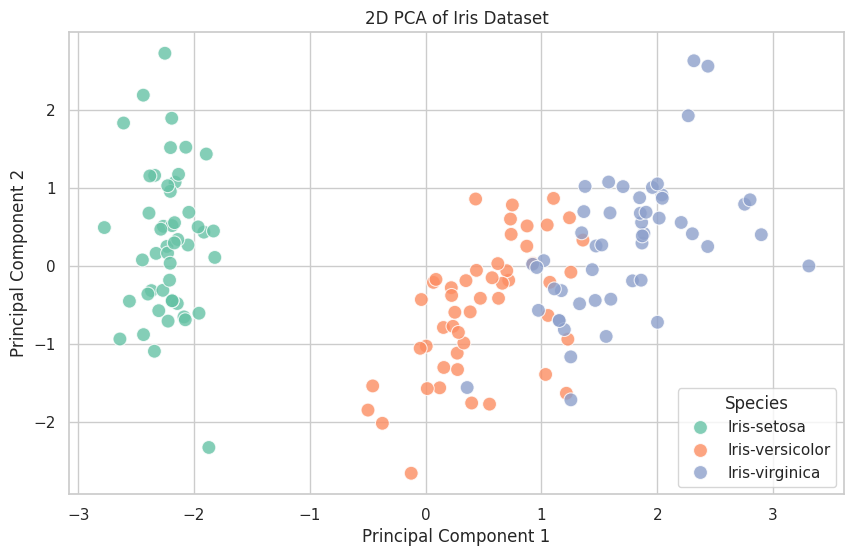

In [5]:
# Plot the 2D PCA result
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Species', palette='Set2', s=100, alpha=0.8)
plt.title("2D PCA of Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Species')
plt.grid(True)
plt.show()

# **Interpretation** **of** **results**

In [6]:
# Show trends and insights
print("Insights from the 2D PCA Scatter Plot:\n")
print("1. The PCA reduced the 4D feature space into 2D while retaining most of the variance.")
print("2. PC1 and PC2 explain around {:.2f}% of the total variance.".format(np.sum(pca.explained_variance_ratio_) * 100))
print("3. Iris-setosa is well-separated from the other two species.")
print("4. Iris-versicolor and Iris-virginica overlap slightly, indicating some similarity.")
print("5. PCA helped in visualizing separability of classes in a lower dimension.")

Insights from the 2D PCA Scatter Plot:

1. The PCA reduced the 4D feature space into 2D while retaining most of the variance.
2. PC1 and PC2 explain around 95.80% of the total variance.
3. Iris-setosa is well-separated from the other two species.
4. Iris-versicolor and Iris-virginica overlap slightly, indicating some similarity.
5. PCA helped in visualizing separability of classes in a lower dimension.
